In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()
import h5py
import numpy as np
from PIL import Image
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd


In [40]:
train_data= pd.read_csv("drive/MyDrive/traindata_week9.csv") 
train_data = np.array(train_data).reshape(1000, 40*60,1)

In [41]:
val_y0 = [1] * 75
val_y1 = [0] * 75
val_y = val_y0 + val_y1
val_y = np.array(val_y)

In [42]:

data = pd.read_csv("drive/MyDrive/testdata_week9.csv") 
#test_data = np.array(test_data).reshape(200, 40*60,1)

In [43]:
val_data = data[25*2400:175*2400]
val_data = np.array(val_data).reshape(150, 40*60,1)

In [48]:
test_data = pd.read_csv("drive/MyDrive/testdata_week9.csv") 
test_data = np.array(test_data).reshape(200, 40*60,1)

In [49]:
train_y0 = [1] * 500
train_y1 = [0] * 500
train_y = train_y0 + train_y1
train_y = np.array(train_y)
test_y0 = [1] * 100
test_y1 = [0] * 100
test_y = test_y0 + test_y1
test_y = np.array(test_y)

In [46]:
import os
import numpy as np

import keras.backend as K

import keras
from keras.layers import Input, Dense, Conv1D, Flatten, MaxPooling1D,BatchNormalization, Reshape
from keras.models import Model, save_model, load_model
#from noise_util import add_distortion_noise, add_distortion_blur
#from noise_util import rotate90_if_not_zero

import matplotlib.pyplot as plt
import sklearn.metrics as sk
#from skimage.filters import gaussian
% matplotlib inline

In [24]:
################try reshape layer

##### Set parameters
training_epochs = 10
input_dim = train_data.shape[1]
n_labels = 2
bottleneck_dim = 128
batch_size = 128

##### Base model
inputs = Input(shape=(input_dim, ), name='seismic_data_input')
reshape = Reshape((input_dim,1))(inputs)
conv1 = Conv1D(100, 4, activation='relu', name='conv1')(reshape)
pool = MaxPooling1D(name='pool')(conv1)
flat = Flatten(name='flat')(pool)

##### Scorer
hidden1 = Dense(128, activation='relu', name='hidden1')(flat)
logits_out = Dense(n_labels, activation='softmax', name='logits_out')(hidden1)


##### Decoder
bottleneck = Dense(bottleneck_dim,
                   activation='relu',
                   name='bottleneck')(flat)
decode1 = Dense(256, activation='relu', name='decode1')(bottleneck)
decode2 = Dense(256, activation='relu', name='decode2')(decode1)
reconstruction = Dense(input_dim, name='rec_output')(decode2)


##### Instantiate base model
base_model = Model(inputs, [flat, logits_out, reconstruction], name='base')

print(base_model.summary())

base_model.compile(optimizer='adam',
                   loss={'logits_out': 'sparse_categorical_crossentropy',
                         'rec_output': 'mean_squared_error'},
                   loss_weights={'logits_out': 0.9,
                                 'rec_output': 0.1},
                   metrics={'logits_out': 'accuracy',
                            'rec_output': 'accuracy'})

##### Train base model
base_model.fit(train_data, train_y,
               validation_data = (test_data, test_y),
               epochs=training_epochs, batch_size=batch_size)

# test_loss, test_acc
test_result = base_model.evaluate(x = test_data, y = test_y)


print("metric names:", base_model.metrics_names)

print(test_result)

# ##### SAVE MODEL
# save_model(base_model, "./mnist_aux_base.hdf5")

Model: "base"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seismic_data_input (InputLayer) [(None, 2400)]       0                                            
__________________________________________________________________________________________________
reshape_7 (Reshape)             (None, 2400, 1)      0           seismic_data_input[0][0]         
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 2397, 100)    500         reshape_7[0][0]                  
__________________________________________________________________________________________________
pool (MaxPooling1D)             (None, 1198, 100)    0           conv1[0][0]                      
_______________________________________________________________________________________________

In [50]:
################try reshape layer

##### Set parameters
training_epochs = 100
input_dim = train_data.shape[1]
n_labels = 2
bottleneck_dim = 128
batch_size = 128

##### Base model
inputs = Input(shape=(input_dim, ), name='seismic_data_input')
reshape = Reshape((input_dim,1))(inputs)
conv1 = Conv1D(32, 15, activation='relu', name='conv1')(reshape)
batch1 = BatchNormalization(name='batch1')(conv1)
pool1 = MaxPooling1D(name='pool1')(batch1)
conv2 = Conv1D(32, 11, activation='relu', name='conv2')(pool1)
batch2 = BatchNormalization(name='batch2')(conv2)
pool2 = MaxPooling1D(name='pool2')(batch2)
#conv3 = Conv1D(64, 9, activation='relu', name='conv3')(pool2)
#batch3 = BatchNormalization(name='batch3')(conv3)
#pool3 = MaxPooling1D(name='pool3')(batch3)

flat = Flatten(name='flat')(pool2)


##### Scorer
hidden1 = Dense(128, activation='relu', name='hidden1')(flat)
logits_out = Dense(n_labels, activation='softmax', name='logits_out')(hidden1)


##### Decoder
bottleneck = Dense(bottleneck_dim,
                   activation='relu',
                   name='bottleneck')(flat)
decode1 = Dense(200, activation='relu', name='decode1')(bottleneck)
decode2 = Dense(200, activation='relu', name='decode2')(decode1)
reconstruction = Dense(input_dim, name='rec_output')(decode2)


##### Instantiate base model
base_model = Model(inputs, [flat, logits_out, reconstruction], name='base')

print(base_model.summary())

base_model.compile(optimizer='adam',
                   loss={'logits_out': 'sparse_categorical_crossentropy',
                         'rec_output': 'mean_squared_error'},
                   loss_weights={'logits_out': 0.9,
                                 'rec_output': 0.1},
                   metrics={'logits_out': 'accuracy',
                            'rec_output': 'accuracy'})

##### Train base model
base_model.fit(train_data, train_y,
               #validation_data = (val_data, val_y),
               epochs=training_epochs, batch_size=batch_size)

# test_loss, test_acc
test_result = base_model.evaluate(x = test_data, y = test_y)


print("metric names:", base_model.metrics_names)

print(test_result)

# ##### SAVE MODEL
# save_model(base_model, "./mnist_aux_base.hdf5")

Model: "base"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seismic_data_input (InputLayer) [(None, 2400)]       0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 2400, 1)      0           seismic_data_input[0][0]         
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 2386, 32)     512         reshape_4[0][0]                  
__________________________________________________________________________________________________
batch1 (BatchNormalization)     (None, 2386, 32)     128         conv1[0][0]                      
_______________________________________________________________________________________________

In [54]:
pred = base_model.predict(test_data)
pred[0]

array([[-0.27800295, -0.11710984, -0.54628867, ...,  1.4272215 ,
        -0.15780659, -0.3889196 ],
       [-0.27800295, -0.11710984, -0.54628867, ...,  1.4272215 ,
        -0.15780659, -0.3889196 ],
       [-0.27800295, -0.11710984, -0.54628867, ...,  1.4272215 ,
        -0.15780659, -0.3889196 ],
       ...,
       [-0.27800295, -0.11710984, -0.54628867, ...,  1.4272215 ,
        -0.15780659, -0.3889196 ],
       [-0.27800295, -0.11710984, -0.54628867, ...,  1.4272215 ,
        -0.15780659, -0.3889196 ],
       [-0.27800295, -0.11710984, -0.54628867, ...,  1.4272215 ,
        -0.15780659, -0.3889196 ]], dtype=float32)

In [52]:
pred = base_model.predict(test_data)
pred_y = pred.argmax(axis=-1)

#Finally, we'll check the prediction accuracy with the confusion matrix.

cm = confusion_matrix(test_y, pred_y)
print(cm)

AttributeError: ignored

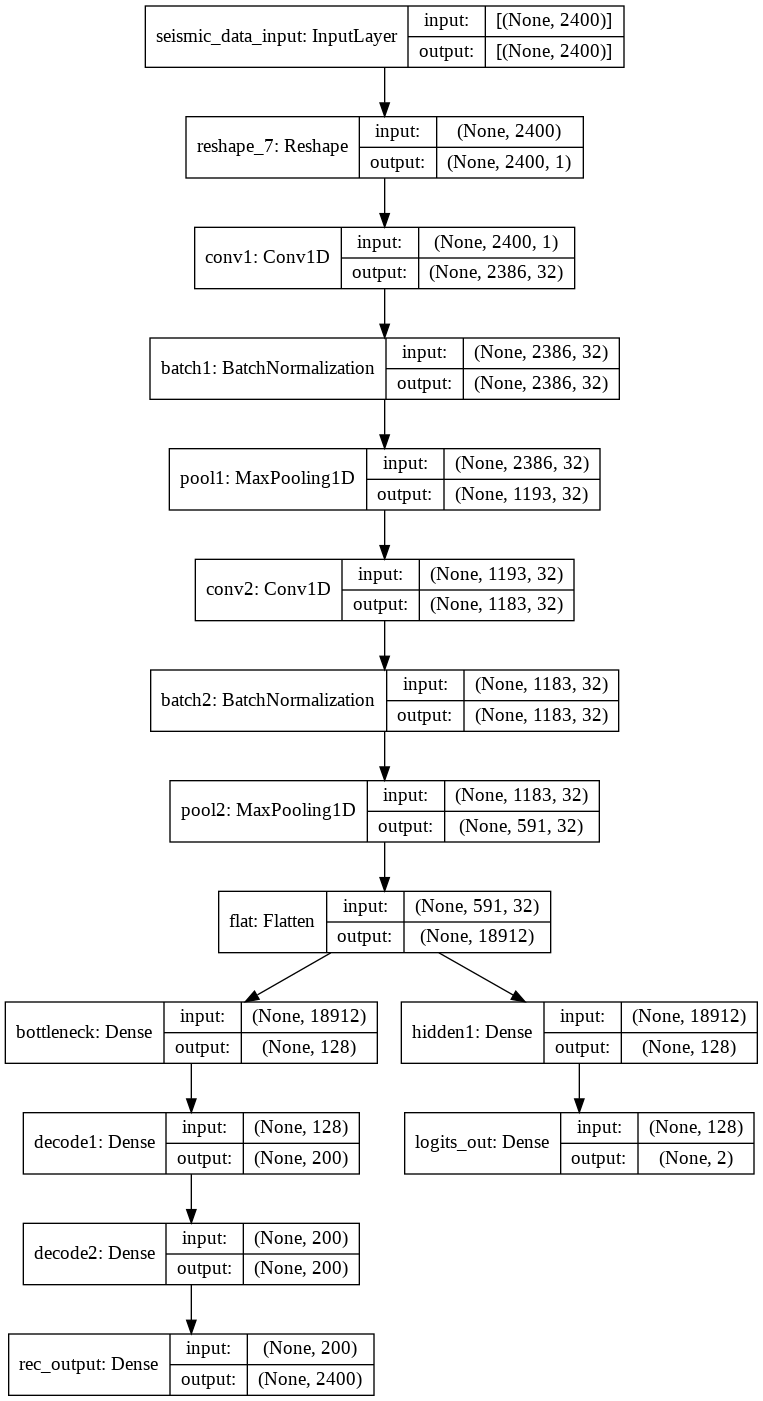

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(base_model, to_file='drive/MyDrive/model_plot.png',show_shapes=True, show_layer_names=True)

In [70]:
id = pd.read_csv("drive/MyDrive/traindata_week9.csv") 
ood = pd.read_csv("drive/MyDrive/hmplist_week9.csv") 


In [71]:
train_id = id[100*2400:]
test_id = id[:100*2400]+id[900*2400:]
train_ood = ood[100*2400:]
test_ood = ood[:100*2400]

In [72]:
frames = [train_id,train_ood]

train_x = pd.concat(frames)
train_x = np.array(train_x).reshape(1640, 40*60,1)

In [74]:
frames = [test_id,test_ood]

test_x = pd.concat(frames)
test_x = np.array(test_x).reshape(300, 40*60,1)


In [76]:
train_y0 = [1] * 900
train_y1 = [0] * 740
train_y = train_y0 + train_y1
train_y = np.array(train_y)
train_y

array([1, 1, 1, ..., 0, 0, 0])

In [75]:
test_y0 = [1] * 200
test_y1 = [0] * 100
test_y = test_y0 + test_y1
test_y = np.array(test_y)
test_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
##### Freeze base model layers to prevent optimization

for l in base_model.layers:
    l.trainable = False

In [78]:
class Merge3Ways(keras.layers.Layer):
    
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(Merge3Ways, self).__init__(**kwargs) # this is the process of creating my own layer

    def build(self, input_shape, dtype = None):

        # Destructuring shapes
        shape_x, shape_h2, shape_logits, shape_rec = list(map(lambda shape: int(shape[1]), input_shape))

        print(shape_h2, self.output_dim)
            
        self.weight1 = self.add_weight(name='h2_to_merge',
                                       shape=(shape_h2, self.output_dim),
                                       initializer='uniform')
        
        self.weight2 = self.add_weight(name='logits_to_merge',
                                       shape=(shape_logits, self.output_dim),
                                       initializer='uniform')
        
        self.weight3 = self.add_weight(name='rec_to_merge',
                                       shape=(shape_rec, self.output_dim),
                                       initializer='uniform')
        
        self.bias = self.add_weight(name='bias',
                                    shape=(self.output_dim,),                                        
                                    initializer='uniform')
        
        super(Merge3Ways, self).build(input_shape)

    def call(self, inputs, dtype = None):

        ##### usage here: merged = Merge3Ways(512)([image_inputs, h2, logits_out, reconstruction])
        ##### inputs here should have a form of list such that: [image_inputs, h2, logits_out, reconstruction]
        
        x, h2, logits_out, reconstruction = inputs
        a1 = K.dot(h2, self.weight1)
        a2 = K.dot(logits_out, self.weight2)
        a3 = K.dot(K.square(reconstruction-x), self.weight3) # subtraction and elementwise squaring
        return (a1 + a2 + a3) + self.bias
    
    def compute_output_shape(self, input_shape):
        return (input_shape[0][0], self.output_dim)

In [79]:
image_inputs = base_model.inputs[0]

##### Deconstruct outputs from previous base model

h2, logits_out, reconstruction = base_model.outputs

In [80]:
merged = Merge3Ways(512)([image_inputs, h2, logits_out, reconstruction]) # output dimension of 512

risk_1 = Dense(128, activation='relu', name='risk_1')(merged)
#risk_1 = Conv1D(128,15, activation='relu', name='risk_1')(merged)
risk_out = Dense(1, name='risk_out', activation='sigmoid')(risk_1)

# Instantiate abnormality module
aux_model = Model(image_inputs, [logits_out, risk_out])

print(aux_model.summary())

18912 512
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
seismic_data_input (InputLayer) [(None, 2400)]       0                                            
__________________________________________________________________________________________________
reshape_4 (Reshape)             (None, 2400, 1)      0           seismic_data_input[0][0]         
__________________________________________________________________________________________________
conv1 (Conv1D)                  (None, 2386, 32)     512         reshape_4[0][0]                  
__________________________________________________________________________________________________
batch1 (BatchNormalization)     (None, 2386, 32)     128         conv1[0][0]                      
__________________________________________________________________________________

In [81]:
aux_model.compile(optimizer='adam',
                  loss={'risk_out': 'binary_crossentropy'},
                  metrics = ['accuracy']
                  )

In [102]:
##### Train base model
aux_model.fit(train_x, train_y,
               validation_data = (test_x, test_y),
               epochs=training_epochs, batch_size=batch_size)

#test_result = aux_model.evaluate(x = ood_test, y = ood_y)


print("metric names:", aux_model.metrics_names)

#print(test_result)



Epoch 1/100
13/13 [==============================] - 1s 43ms/step - loss: 0.0669 - risk_out_loss: 0.0669 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9817 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 2/100
13/13 [==============================] - 0s 35ms/step - loss: 0.0594 - risk_out_loss: 0.0594 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9835 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 3/100
13/13 [==============================] - 0s 33ms/step - loss: 0.0493 - risk_out_loss: 0.0493 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9848 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 4/100
13/13 [==============================] - 0s 33ms/step - loss: 0.0579 - risk_out_loss: 0.0579 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9848 - val_loss: nan - val_risk_

In [108]:
ood_y = np.array(ood_y).reshape(400,1)

In [110]:
aux_model.fit(train_x, train_y,
               validation_data = (test_x, test_y),
               epochs=training_epochs, batch_size=batch_size)



print("metric names:", aux_model.metrics_names)


Epoch 1/100
13/13 [==============================] - 1s 43ms/step - loss: 0.0432 - risk_out_loss: 0.0432 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9890 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 2/100
13/13 [==============================] - 0s 36ms/step - loss: 0.0661 - risk_out_loss: 0.0661 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9811 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 3/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0772 - risk_out_loss: 0.0772 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9762 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 4/100
13/13 [==============================] - 0s 33ms/step - loss: 0.1235 - risk_out_loss: 0.1235 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9665 - val_loss: nan - val_risk_

In [111]:
len_testset = test_data.shape[0]
test_result = aux_model.evaluate(x=ood_test,
                                 y=ood_y)
print("metric names:", aux_model.metrics_names)
print(test_result)

13/13 [==============================] - 0s 11ms/step - loss: 29.0896 - risk_out_loss: 29.0896 - logits_out_accuracy: 0.9800 - risk_out_accuracy: 0.3350
metric names: ['loss', 'risk_out_loss', 'logits_out_accuracy', 'risk_out_accuracy']
[29.089645385742188, 29.089645385742188, 0.9800000190734863, 0.33500000834465027]


In [103]:
##### Train base model
aux_model.fit(train_x, train_y,
               validation_data = (test_x, test_y),
               epochs=training_epochs, batch_size=batch_size)

len_testset = test_data.shape[0]
test_result = aux_model.evaluate(x=test_data,
                                 y=np.ones(shape=(len_testset, 1)))

print("metric names:", aux_model.metrics_names)
print(test_result)

Epoch 1/100
13/13 [==============================] - 1s 43ms/step - loss: 0.1164 - risk_out_loss: 0.1164 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9793 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 2/100
13/13 [==============================] - 0s 37ms/step - loss: 0.1294 - risk_out_loss: 0.1294 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9689 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3033
Epoch 3/100
13/13 [==============================] - 0s 33ms/step - loss: 0.1025 - risk_out_loss: 0.1025 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9835 - val_loss: nan - val_risk_out_loss: nan - val_logits_out_accuracy: 0.0933 - val_risk_out_accuracy: 0.3000
Epoch 4/100
13/13 [==============================] - 0s 34ms/step - loss: 0.0711 - risk_out_loss: 0.0711 - logits_out_accuracy: 0.5909 - risk_out_accuracy: 0.9768 - val_loss: nan - val_risk_

In [173]:
test_result = aux_model.evaluate(x=ood_earth,
                                 y=ood_earth_y)
print("metric names:", aux_model.metrics_names)
print(test_result)

7/7 [==============================] - 0s 11ms/step - loss: 48.1077 - risk_out_loss: 48.1077 - logits_out_accuracy: 0.9900 - risk_out_accuracy: 0.0850
metric names: ['loss', 'risk_out_loss', 'logits_out_accuracy', 'risk_out_accuracy']
[48.107730865478516, 48.107730865478516, 0.9900000095367432, 0.08500000089406967]


In [169]:
ood_test_earth = pd.read_csv("drive/MyDrive/traindata_week9.csv")
ood_test_earth = ood_test_earth[:200*2400]
ood_test_earth = ood_test_earth[::-1]

In [170]:
ood_earth = np.array(ood_test_earth).reshape(200, 40*60,1)

In [98]:
ood_test_hmp = pd.read_csv("drive/MyDrive/hmplist_week9.csv")
ood_test_hmp = ood_test_hmp[:200*2400]
ood_test_hmp = ood_test_hmp[::-1]

In [99]:

frames = [ood_test_earth,ood_test_hmp]

ood_test = pd.concat(frames)
ood_test = np.array(ood_test).reshape(400, 40*60,1)

In [171]:
ood_earth_y = [0]*200

In [172]:
ood_earth_y = np.array(ood_earth_y).reshape(200,1)

In [100]:
ood_y = [0]*400

In [117]:
ood_test_earth = pd.read_csv("drive/MyDrive/traindata_week9.csv")


In [118]:
ood_test_earth = ood_test_earth[600*2400:800*2400]
ood_test_earth = np.array(ood_test_earth).reshape(200, 40*60)

In [101]:
ood_y_earth = [0]*200

In [111]:
ood_test_hmp = pd.read_csv("drive/MyDrive/hmplist_week9.csv")
ood_test_hmp = ood_test[:200*2400]

In [103]:
ood_test_hmp = np.array(ood_test).reshape(200, 40*60)

In [104]:
ood_y_hmp = [0]*200

In [86]:
#ood_test_flip = ood_test[::-1]
#ood_test_flip = np.array(ood_test_flip).reshape(200, 40*60,1)

In [113]:

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()



image label: 1


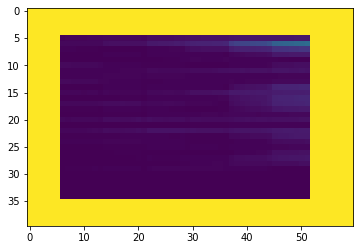

The succ/failure classification: [0]
Softmax probability of in/out distribution: 0.00


In [178]:
single_mnist_out_test = np.reshape(ood_test[41], (40, 60))

##### printing original image
    
print('image label:', 1)
plt.imshow(single_mnist_out_test)
plt.show()
plt.close()
result_out = aux_model.predict(np.reshape(single_mnist_out_test, (1,single_mnist_out_test.ravel().shape[0])))
#print(result_out)
#max_index = (softmax(result_out[0])[0] == max(softmax(result_out[0])[0]))
max_index = [i[0] for i in enumerate(softmax(result_out[0])[0] == max(softmax(result_out[0])[0])) if i[1]]
print('The succ/failure classification:', max_index)
print('Softmax probability of in/out distribution:', format(result_out[1][0][0], '.2f'))

array([[1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [0.8001791 ],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [0.99951863],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.   

In [71]:
result[1]

[0.9996250867843628, 0.00037487706867977977]

In [70]:
count = len([i for i in result if i < 0.5])
count

TypeError: ignored

In [59]:
pred = aux_model.predict(ood_test)
pred_y = pred.argmax(axis=-1)

#Finally, we'll check the prediction accuracy with the confusion matrix.

cm = confusion_matrix(ood_y, pred_y)
print(cm)


AttributeError: ignored

Model: "base"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        [(None, 2400)]       0                                            
__________________________________________________________________________________________________
h1 (Dense)                      (None, 256)          614656      image_input[0][0]                
__________________________________________________________________________________________________
h2 (Dense)                      (None, 256)          65792       h1[0][0]                         
__________________________________________________________________________________________________
bottleneck (Dense)              (None, 128)          32896       h2[0][0]                         
_______________________________________________________________________________________________

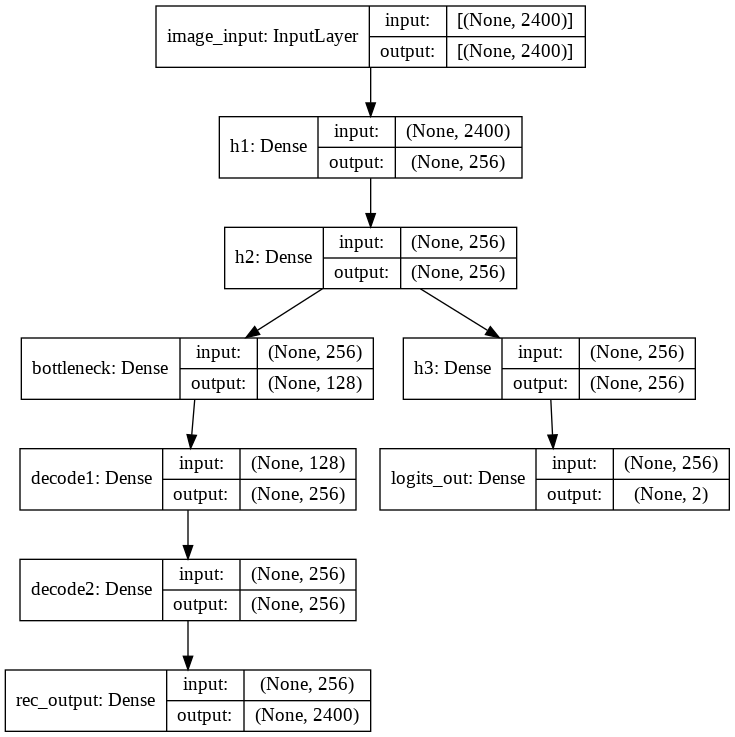

In [13]:
import tensorflow as tf
##### Set parameters
training_epochs = 10
#image_size = 28
input_dim = 40*60
n_labels = 2
bottleneck_dim = 128
batch_size = 128

##### Base model
inputs = Input(shape=(input_dim, ), name='image_input')
h1 = Dense(256, activation='relu', name='h1')(inputs)
h2 = Dense(256, activation='relu', name='h2')(h1)

##### Scorer
h3 = Dense(256, activation='relu', name='h3')(h2)
logits_out = Dense(n_labels, activation='softmax', name='logits_out')(h3)

##### Decoder
bottleneck = Dense(bottleneck_dim,
                   activation='relu',
                   name='bottleneck')(h2)
decode1 = Dense(256, activation='relu', name='decode1')(bottleneck)
decode2 = Dense(256, activation='relu', name='decode2')(decode1)
reconstruction = Dense(input_dim, name='rec_output')(decode2)

##### Instantiate base model
base_model = Model(inputs, [h2, logits_out, reconstruction], name='base')

print(base_model.summary())
plot_model(base_model, to_file='drive/MyDrive/model_plot.png',show_shapes=True, show_layer_names=True)


In [14]:
base_model.compile(optimizer='adam',
                   loss={'logits_out': 'sparse_categorical_crossentropy',
                         'rec_output': 'mean_squared_error'},
                   loss_weights={'logits_out': 0.9,
                                 'rec_output': 0.1},
                   metrics={'logits_out': 'accuracy',
                            'rec_output': 'accuracy'})

##### Train base model
base_model.fit(train_data, train_y,
               validation_data = (test_data, test_y),
               epochs=training_epochs, batch_size=batch_size)

# test_loss, test_acc
test_result = base_model.evaluate(x = test_data, y = test_y)


print("metric names:", base_model.metrics_names)

print(test_result)

Epoch 1/10
8/8 [==============================] - 2s 120ms/step - loss: 0.8794 - logits_out_loss: 0.9268 - rec_output_loss: 0.4534 - logits_out_accuracy: 0.5178 - rec_output_accuracy: 0.0000e+00 - val_loss: 0.6474 - val_logits_out_loss: 0.6853 - val_rec_output_loss: 0.3066 - val_logits_out_accuracy: 0.9300 - val_rec_output_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 41ms/step - loss: 0.6466 - logits_out_loss: 0.6870 - rec_output_loss: 0.2833 - logits_out_accuracy: 0.6212 - rec_output_accuracy: 0.0000e+00 - val_loss: 0.6311 - val_logits_out_loss: 0.6727 - val_rec_output_loss: 0.2568 - val_logits_out_accuracy: 0.5000 - val_rec_output_accuracy: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 42ms/step - loss: 0.6394 - logits_out_loss: 0.6817 - rec_output_loss: 0.2588 - logits_out_accuracy: 0.5145 - rec_output_accuracy: 0.0000e+00 - val_loss: 0.6449 - val_logits_out_loss: 0.6888 - val_rec_output_loss: 0.2499 - val_logits_out_accuracy: 0.5000 - 

In [23]:
##### Set parameters
training_epochs = 10
input_dim = train_data.shape[1]
n_labels = 2
batch_size = 128
bottleneck_dim = 128

##### Base model
inputs = Input(shape=(input_dim, ), name='seismic_data_input')
reshape = Reshape((input_dim,1))(inputs)

#inputs = Input(shape=(train_data.shape[1], train_data.shape[2]), name='seismic_data_input')
conv1 = Conv1D(32, 15, activation='relu', name='conv1')(reshape)
pool = MaxPooling1D(name='pool')(conv1)
flat = Flatten(name='flat')(pool)

##### Scorer

hidden1 = Dense(32, activation='relu', name='hidden1')(flat)
logits_out = Dense(n_labels, activation='softmax', name='logits_out')(hidden1)

#dense1 = Dense(32, activation='relu',name="dense1")(flat1)


#logits_out = Dense(n_labels, activation='softmax', name='logits_out')(dense1)
#logits_out = Dense(n_labels, activation='softmax', name='logits_out')(flat1)

##### Decoder
bottleneck = Dense(bottleneck_dim,
                   activation='relu',
                   name='bottleneck')(maxpool2)
decode1 = Conv1D(64,9, activation='relu', name='decode1')(bottleneck)
decode2 = Conv1D(64,4, activation='relu', name='decode2')(decode1)
reconstruction = Dense(input_dim, name='rec_output')(decode2)

##### Instantiate base model
base_model = Model(inputs, [flat, logits_out, reconstruction], name='base')

print(base_model.summary())



ValueError: ignored

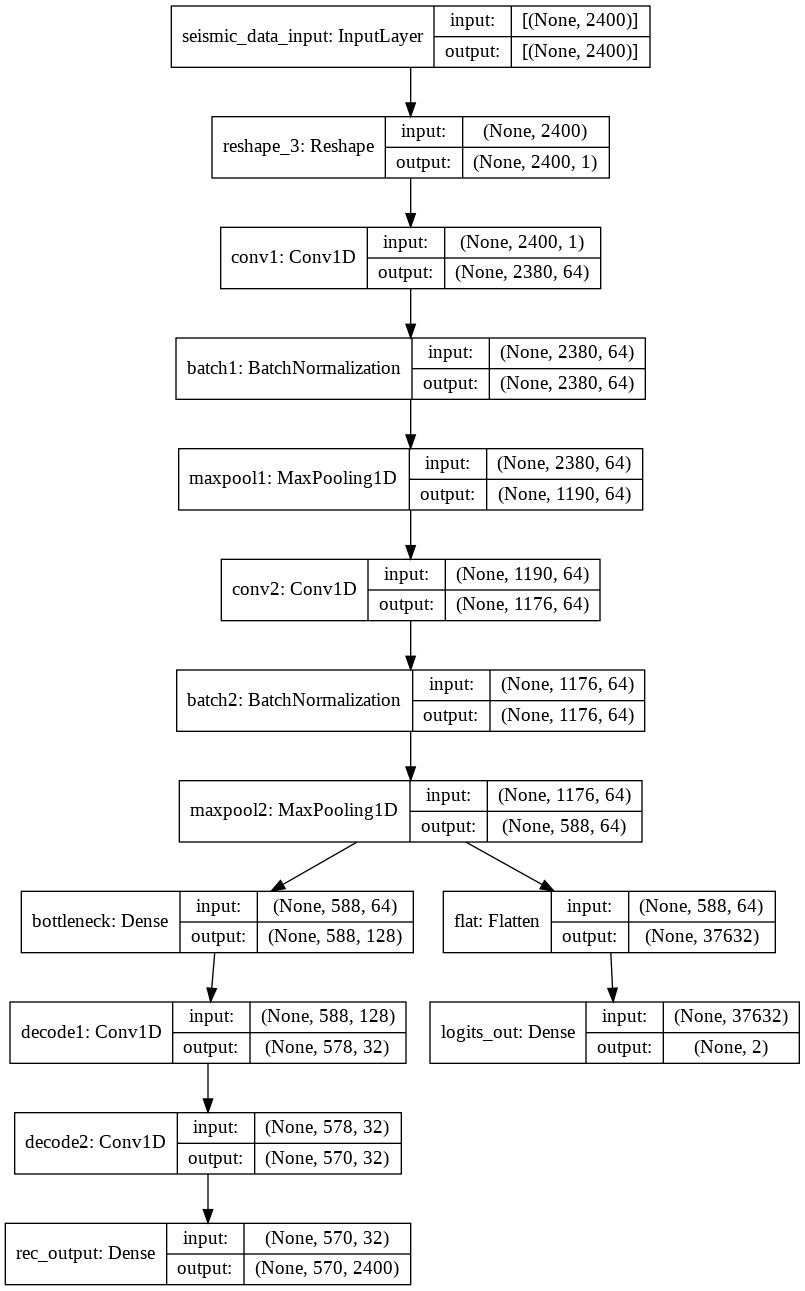

In [19]:
plot_model(base_model, to_file='drive/MyDrive/model_plot.png',show_shapes=True, show_layer_names=True)

In [20]:
base_model.compile(optimizer='adam',
                   loss={'logits_out': 'sparse_categorical_crossentropy',
                         'rec_output': 'mean_squared_error'},
                   loss_weights={'logits_out': 0.9,
                                 'rec_output': 0.1},
                   metrics={'logits_out': 'accuracy',
                            'rec_output': 'accuracy'})

##### Train base model
base_model.fit(train_data, train_y,
               validation_data = (test_data, test_y),
               epochs=training_epochs, batch_size=batch_size)

# test_loss, test_acc
test_result = base_model.evaluate(x = test_data, y = test_y)


print("metric names:", base_model.metrics_names)

print(test_result)

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,BatchNormalization,Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#from sklearn.datasets import load_iris
from numpy import unique

model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(288*432,1)))
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Conv1D(64, 2, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Conv1D(128, 2, activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling1D())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(2, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', 
     optimizer = "adam",               
              metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 124415, 32)        96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 124415, 32)        128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 62207, 32)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 62206, 64)         4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 62206, 64)         256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 31103, 64)         0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 31102, 128)       

In [ ]:
history = model.fit(train_data, train_y, batch_size=128,epochs=10, verbose=1, validation_data=(test_data, test_y))

Epoch 1/10


In [ ]:
acc_train = model.evaluate(train_data, train_y)
print("train loss:", acc_train[0], " train acc:", acc_train[1])
acc_test = model.evaluate(test_data, test_y)
print("test loss:", acc_test[0], " test acc:", acc_test[1])

32/32 [==============================] - 32s 995ms/step - loss: 0.6921 - accuracy: 0.5500
train loss: 0.6920862793922424  train acc: 0.550000011920929
7/7 [==============================] - 6s 865ms/step - loss: 0.6921 - accuracy: 0.5250
test loss: 0.6921468377113342  test acc: 0.5249999761581421


In [ ]:
pred_test = model.predict(test_data)
pred_y = pred_test.argmax(axis=-1)

cm = confusion_matrix(test_y, pred_y)
print(cm)

[[100   0]
 [ 95   5]]


In [ ]:
##### Set parameters
training_epochs = 10
input_dim = 288*432
n_labels = 2
batch_size = 128

##### Base model
inputs = Input(shape=(288*432, 1,), name='seismic_data_input')

conv1 = Conv1D(64, 2, activation='relu', name='conv1')(inputs)
#conv1 = Conv1D(64, 2, activation="relu", input_shape=(288*432,1), name='conv1')
conv2 = Conv1D(64, 2, activation='relu', name='conv2')(conv1)

##### Scorer
pool = MaxPooling1D(name='pool')(conv2)
flat = Flatten(name='flat')(pool)
logits_out = Dense(n_labels, activation='softmax', name='logits_out')(flat)


##### Decoder
conv3 = Conv1D(64, 2, activation='relu', name='conv3')(conv2)
conv4 = Conv1D(32, 2, activation='relu', name='conv4')(conv3)
pool1 = MaxPooling1D(name='pool1')(conv4)
flat1 = Flatten(name='flat1')(pool1)
reconstruction = Dense(input_dim, name='rec_output')(flat1)


##### Instantiate base model
base_model = Model(inputs, [conv2, logits_out, reconstruction], name='base')

print(base_model.summary())
